# Homework 2 Problem 3


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

%matplotlib inline

In [2]:
# Reading the test and train csv files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# This is being done to increse the visibility of table in jupyter notebook
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [3]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
len(test.columns)
len(train.columns)

81

### Transformation on the respones variable SalePrice
Let's check the distribution of the response variable SalePrice
It seems not very normal distributed, what can we do about it??
Please apply the log transformation on the price and plot the distribution of the sale price, is it more normal?

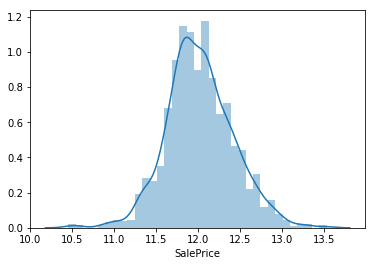

In [5]:
# Doing log transformation of sales price
train['SalePrice']=np.log(train['SalePrice'])
sns.distplot(train['SalePrice']);
# Fill in your code for transformation

### Preprocessing: Deal with the missing data (NA) and create dummy variable for categorical variables

Please use the mean of the training data to fit in the NA in both training and testing data set. Please also create dummy variables for all the text dataset.

In [6]:
# Droping Id column from both train and test as it won't be of any use
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [7]:
cols_to_norm =[]
cols_to_norm_test=[]
cols_to_no =[]
cols_to_no_test=[]

In [8]:
# Put your code here
# To check which columns has NAs
# Replacing Numeric columns of train data with the mean and categorical columns with mode
for col in train.columns:
    if train[col].isnull().values.any() == True:
        if np.issubdtype(train[col].dtype, np.number) == True:
            train[col].fillna((train[col].mean()), inplace=True)
        else:
            train[col].fillna((train[col].value_counts().index[0]), inplace=True)

# Replacing Numeric columns of train data with the mean and categorical columns with mode
for col in test.columns:
    if test[col].isnull().values.any() == True:
        if np.issubdtype(test[col].dtype, np.number) == True:
            test[col].fillna((train[col].mean()), inplace=True)
        else:
            test[col].fillna((train[col].value_counts().index[0]), inplace=True)

# Storing categolical and numelical column names for both test and train in different lists
for col in train.columns:
    if np.issubdtype(train[col].dtype, np.number) == False:
        cols_to_norm.append(col) # Storing categorical column name
    else:
        cols_to_no.append(col) # Storing numerical column name
        
for col in test.columns:
    if np.issubdtype(test[col].dtype, np.number) == False:
        cols_to_norm_test.append(col) # Storing categorical column name
    else:
        cols_to_no_test.append(col) # Storing numerical column name

In [9]:
len(cols_to_norm_test)

43

In [10]:
# Appending sales price to list of categorical variables and removing it from list of numeric variables
# As we wont be normalizing Salesprice
cols_to_norm.append('SalePrice')

In [11]:
cols_to_no=cols_to_no[:-1]

In [12]:
# Normalizing the data for both test and train columns which are numerical except SalePrice
from sklearn.preprocessing import normalize
scaler = normalize(train.drop(train[cols_to_norm],axis=1))
df_train = pd.DataFrame(scaler,columns=cols_to_no)
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.006206,0.006724,0.874061,0.000724,0.000517,0.207189,0.207189,0.020274,0.073028,0.0,0.015516,0.088544,0.088544,0.088337,0.0,0.176881,0.000103,0.000000,0.000207,0.000103,0.000310,0.000103,0.000828,0.000000,0.207189,0.000207,0.056685,0.000000,0.006310,0.000000,0.0,0.0,0.0,0.0,0.000207,0.207706
1,0.001873,0.007492,0.899027,0.000562,0.000749,0.185050,0.185050,0.000000,0.091588,0.0,0.026596,0.118185,0.118185,0.000000,0.0,0.118185,0.000000,0.000094,0.000187,0.000000,0.000281,0.000094,0.000562,0.000094,0.185050,0.000187,0.043078,0.027907,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000468,0.187953
2,0.004914,0.005569,0.921408,0.000573,0.000410,0.163888,0.163970,0.013268,0.039805,0.0,0.035546,0.075351,0.075351,0.070928,0.0,0.146279,0.000082,0.000000,0.000164,0.000082,0.000246,0.000082,0.000491,0.000082,0.163888,0.000164,0.049797,0.000000,0.003440,0.000000,0.0,0.0,0.0,0.0,0.000737,0.164461
3,0.006596,0.005654,0.899920,0.000660,0.000471,0.180455,0.185638,0.000000,0.020354,0.0,0.050886,0.071240,0.090557,0.071240,0.0,0.161797,0.000094,0.000000,0.000094,0.000000,0.000283,0.000094,0.000660,0.000094,0.188277,0.000283,0.060497,0.000000,0.003298,0.025631,0.0,0.0,0.0,0.0,0.000188,0.189030
4,0.003961,0.005545,0.941327,0.000528,0.000330,0.132023,0.132023,0.023104,0.043238,0.0,0.032346,0.075583,0.075583,0.069510,0.0,0.145094,0.000066,0.000000,0.000132,0.000066,0.000264,0.000066,0.000594,0.000066,0.132023,0.000198,0.055186,0.012674,0.005545,0.000000,0.0,0.0,0.0,0.0,0.000792,0.132551


In [13]:

from sklearn.preprocessing import normalize
scaler_t = normalize(test.drop(test[cols_to_norm_test],axis=1))
df_test = pd.DataFrame(scaler_t,columns=cols_to_no_test)
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.001612,0.006448,0.936778,0.000403,0.000484,0.158064,0.158064,0.000000,0.037723,0.011607,0.021763,0.071093,0.072221,0.000000,0.0,0.072221,0.0,0.0,0.000081,0.000000,0.000161,0.000081,0.000403,0.000000,0.158064,0.000081,0.058841,0.011285,0.000000,0.0,0.0,0.009672,0.0,0.000000,0.000484,0.162014
1,0.001023,0.004145,0.730034,0.000307,0.000307,0.100190,0.100190,0.005526,0.047229,0.000000,0.020775,0.068004,0.068004,0.000000,0.0,0.068004,0.0,0.0,0.000051,0.000051,0.000154,0.000051,0.000307,0.000000,0.100190,0.000051,0.015965,0.020110,0.001842,0.0,0.0,0.000000,0.0,0.639618,0.000307,0.102851
2,0.004110,0.005069,0.947446,0.000343,0.000343,0.136808,0.136876,0.000000,0.054189,0.000000,0.009385,0.063574,0.063574,0.048023,0.0,0.111597,0.0,0.0,0.000137,0.000069,0.000206,0.000069,0.000411,0.000069,0.136808,0.000137,0.033020,0.014523,0.002329,0.0,0.0,0.000000,0.0,0.000000,0.000206,0.137698
3,0.005451,0.007086,0.906516,0.000545,0.000545,0.181521,0.181521,0.001817,0.054693,0.000000,0.029436,0.084128,0.084128,0.061597,0.0,0.145726,0.0,0.0,0.000182,0.000091,0.000273,0.000091,0.000636,0.000091,0.181521,0.000182,0.042700,0.032707,0.003271,0.0,0.0,0.000000,0.0,0.000000,0.000545,0.182611
4,0.017446,0.006251,0.727637,0.001163,0.000727,0.289601,0.289601,0.000000,0.038235,0.000000,0.147853,0.186089,0.186089,0.000000,0.0,0.186089,0.0,0.0,0.000291,0.000000,0.000291,0.000145,0.000727,0.000000,0.289601,0.000291,0.073563,0.000000,0.011921,0.0,0.0,0.020935,0.0,0.000000,0.000145,0.292218


In [14]:
# Joining back the categorical variables to train data frame
df_train=pd.concat([df_train, train[cols_to_norm]], axis=1)

In [15]:
# Joining back the categorical variables to Test data frame
df_test=pd.concat([df_test, test[cols_to_norm_test]], axis=1)

In [16]:
print(df_train.shape)
print(df_test.shape)

(1460, 80)
(1459, 79)


In [17]:
# Creating dummy variables for train and Test
for col in df_train.columns:
    if np.issubdtype(df_train[col].dtype, np.number) == False:
        Col = pd.get_dummies(df_train[col])
        df_train.drop([col],axis=1,inplace=True)
        Col = Col.add_suffix(col)
        df_train = pd.concat([df_train,Col],axis=1)
for col in df_test.columns:
    if np.issubdtype(df_test[col].dtype, np.number) == False:
        Col = pd.get_dummies(df_test[col])
        df_test.drop([col],axis=1,inplace=True)
        Col = Col.add_suffix(col)
        df_test = pd.concat([df_test,Col],axis=1)

In [18]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,C (all)MSZoning,FVMSZoning,RHMSZoning,RLMSZoning,RMMSZoning,GrvlStreet,PaveStreet,GrvlAlley,PaveAlley,IR1LotShape,IR2LotShape,IR3LotShape,RegLotShape,BnkLandContour,HLSLandContour,LowLandContour,LvlLandContour,AllPubUtilities,NoSeWaUtilities,CornerLotConfig,CulDSacLotConfig,FR2LotConfig,FR3LotConfig,InsideLotConfig,GtlLandSlope,ModLandSlope,SevLandSlope,BlmngtnNeighborhood,BluesteNeighborhood,BrDaleNeighborhood,BrkSideNeighborhood,ClearCrNeighborhood,CollgCrNeighborhood,CrawforNeighborhood,EdwardsNeighborhood,GilbertNeighborhood,IDOTRRNeighborhood,MeadowVNeighborhood,MitchelNeighborhood,NAmesNeighborhood,NPkVillNeighborhood,NWAmesNeighborhood,NoRidgeNeighborhood,NridgHtNeighborhood,OldTownNeighborhood,SWISUNeighborhood,SawyerNeighborhood,SawyerWNeighborhood,SomerstNeighborhood,StoneBrNeighborhood,TimberNeighborhood,VeenkerNeighborhood,ArteryCondition1,FeedrCondition1,NormCondition1,PosACondition1,PosNCondition1,RRAeCondition1,RRAnCondition1,RRNeCondition1,RRNnCondition1,ArteryCondition2,FeedrCondition2,NormCondition2,PosACondition2,PosNCondition2,RRAeCondition2,RRAnCondition2,RRNnCondition2,1FamBldgType,2fmConBldgType,DuplexBldgType,TwnhsBldgType,TwnhsEBldgType,1.5FinHouseStyle,1.5UnfHouseStyle,1StoryHouseStyle,2.5FinHouseStyle,2.5UnfHouseStyle,2StoryHouseStyle,SFoyerHouseStyle,SLvlHouseStyle,FlatRoofStyle,GableRoofStyle,GambrelRoofStyle,HipRoofStyle,MansardRoofStyle,ShedRoofStyle,ClyTileRoofMatl,CompShgRoofMatl,MembranRoofMatl,MetalRoofMatl,RollRoofMatl,Tar&GrvRoofMatl,WdShakeRoofMatl,WdShnglRoofMatl,AsbShngExterior1st,AsphShnExterior1st,BrkCommExterior1st,BrkFaceExterior1st,CBlockExterior1st,CemntBdExterior1st,HdBoardExterior1st,ImStuccExterior1st,MetalSdExterior1st,PlywoodExterior1st,StoneExterior1st,StuccoExterior1st,VinylSdExterior1st,Wd SdngExterior1st,WdShingExterior1st,AsbShngExterior2nd,AsphShnExterior2nd,Brk CmnExterior2nd,BrkFaceExterior2nd,CBlockExterior2nd,CmentBdExterior2nd,HdBoardExterior2nd,ImStuccExterior2nd,MetalSdExterior2nd,OtherExterior2nd,PlywoodExterior2nd,StoneExterior2nd,StuccoExterior2nd,VinylSdExterior2nd,Wd SdngExterior2nd,Wd ShngExterior2nd,BrkCmnMasVnrType,BrkFaceMasVnrType,NoneMasVnrType,StoneMasVnrType,ExExterQual,FaExterQual,GdExterQual,TAExterQual,ExExterCond,FaExterCond,GdExterCond,PoExterCond,TAExterCond,BrkTilFoundation,CBlockFoundation,PConcFoundation,SlabFoundation,StoneFoundation,WoodFoundation,ExBsmtQual,FaBsmtQual,GdBsmtQual,TABsmtQual,FaBsmtCond,GdBsmtCond,PoBsmtCond,TABsmtCond,AvBsmtExposure,GdBsmtExposure,MnBsmtExposure,NoBsmtExposure,ALQBsmtFinType1,BLQBsmtFinType1,GLQBsmtFinType1,LwQBsmtFinType1,RecBsmtFinType1,UnfBsmtFinType1,ALQBsmtFinType2,BLQBsmtFinType2,GLQBsmtFinType2,LwQBsmtFinType2,RecBsmtFinType2,UnfBsmtFinType2,FloorHeating,GasAHeating,GasWHeating,GravHeating,OthWHeating,WallHeating,ExHeatingQC,FaHeatingQC,GdHeatingQC,PoHeatingQC,TAHeatingQC,NCentralAir,YCentralAir,FuseAElectrical,FuseFElectrical,FusePElectrical,MixElectrical,SBrkrElectrical,ExKitchenQual,FaKitchenQual,GdKitchenQual,TAKitchenQual,Maj1Functional,Maj2Functional,Min1Functional,Min2Functional,ModFunctional,SevFunctional,TypFunctional,ExFireplaceQu,FaFireplaceQu,GdFireplaceQu,PoFireplaceQu,TAFireplaceQu,2TypesGarageType,AttchdGarageType,BasmentGarageType,BuiltInGarageType,CarPortGarageType,DetchdGarageType,FinGarageFinish,RFnGarageFinish,UnfGarageFinish,ExGarageQual,FaGarageQual,GdGarageQual,PoGarageQual,TAGarageQual,ExGarageCond,FaGarageCond,GdGarageCond,PoGarageCond,TAGarageCond,NPavedDrive,PPavedDrive,YPavedDrive,ExPoolQC,FaPoolQC,GdPoolQC,GdPrvFence,GdWoFence,MnPrvFence,MnWwFence,Gar2MiscFeature,OthrMiscFeatur

In [19]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,C (all)MSZoning,FVMSZoning,RHMSZoning,RLMSZoning,RMMSZoning,GrvlStreet,PaveStreet,GrvlAlley,PaveAlley,IR1LotShape,IR2LotShape,IR3LotShape,RegLotShape,BnkLandContour,HLSLandContour,LowLandContour,LvlLandContour,AllPubUtilities,CornerLotConfig,CulDSacLotConfig,FR2LotConfig,FR3LotConfig,InsideLotConfig,GtlLandSlope,ModLandSlope,SevLandSlope,BlmngtnNeighborhood,BluesteNeighborhood,BrDaleNeighborhood,BrkSideNeighborhood,ClearCrNeighborhood,CollgCrNeighborhood,CrawforNeighborhood,EdwardsNeighborhood,GilbertNeighborhood,IDOTRRNeighborhood,MeadowVNeighborhood,MitchelNeighborhood,NAmesNeighborhood,NPkVillNeighborhood,NWAmesNeighborhood,NoRidgeNeighborhood,NridgHtNeighborhood,OldTownNeighborhood,SWISUNeighborhood,SawyerNeighborhood,SawyerWNeighborhood,SomerstNeighborhood,StoneBrNeighborhood,TimberNeighborhood,VeenkerNeighborhood,ArteryCondition1,FeedrCondition1,NormCondition1,PosACondition1,PosNCondition1,RRAeCondition1,RRAnCondition1,RRNeCondition1,RRNnCondition1,ArteryCondition2,FeedrCondition2,NormCondition2,PosACondition2,PosNCondition2,1FamBldgType,2fmConBldgType,DuplexBldgType,TwnhsBldgType,TwnhsEBldgType,1.5FinHouseStyle,1.5UnfHouseStyle,1StoryHouseStyle,2.5UnfHouseStyle,2StoryHouseStyle,SFoyerHouseStyle,SLvlHouseStyle,FlatRoofStyle,GableRoofStyle,GambrelRoofStyle,HipRoofStyle,MansardRoofStyle,ShedRoofStyle,CompShgRoofMatl,Tar&GrvRoofMatl,WdShakeRoofMatl,WdShnglRoofMatl,AsbShngExterior1st,AsphShnExterior1st,BrkCommExterior1st,BrkFaceExterior1st,CBlockExterior1st,CemntBdExterior1st,HdBoardExterior1st,MetalSdExterior1st,PlywoodExterior1st,StuccoExterior1st,VinylSdExterior1st,Wd SdngExterior1st,WdShingExterior1st,AsbShngExterior2nd,AsphShnExterior2nd,Brk CmnExterior2nd,BrkFaceExterior2nd,CBlockExterior2nd,CmentBdExterior2nd,HdBoardExterior2nd,ImStuccExterior2nd,MetalSdExterior2nd,PlywoodExterior2nd,StoneExterior2nd,StuccoExterior2nd,VinylSdExterior2nd,Wd SdngExterior2nd,Wd ShngExterior2nd,BrkCmnMasVnrType,BrkFaceMasVnrType,NoneMasVnrType,StoneMasVnrType,ExExterQual,FaExterQual,GdExterQual,TAExterQual,ExExterCond,FaExterCond,GdExterCond,PoExterCond,TAExterCond,BrkTilFoundation,CBlockFoundation,PConcFoundation,SlabFoundation,StoneFoundation,WoodFoundation,ExBsmtQual,FaBsmtQual,GdBsmtQual,TABsmtQual,FaBsmtCond,GdBsmtCond,PoBsmtCond,TABsmtCond,AvBsmtExposure,GdBsmtExposure,MnBsmtExposure,NoBsmtExposure,ALQBsmtFinType1,BLQBsmtFinType1,GLQBsmtFinType1,LwQBsmtFinType1,RecBsmtFinType1,UnfBsmtFinType1,ALQBsmtFinType2,BLQBsmtFinType2,GLQBsmtFinType2,LwQBsmtFinType2,RecBsmtFinType2,UnfBsmtFinType2,GasAHeating,GasWHeating,GravHeating,WallHeating,ExHeatingQC,FaHeatingQC,GdHeatingQC,PoHeatingQC,TAHeatingQC,NCentralAir,YCentralAir,FuseAElectrical,FuseFElectrical,FusePElectrical,SBrkrElectrical,ExKitchenQual,FaKitchenQual,GdKitchenQual,TAKitchenQual,Maj1Functional,Maj2Functional,Min1Functional,Min2Functional,ModFunctional,SevFunctional,TypFunctional,ExFireplaceQu,FaFireplaceQu,GdFireplaceQu,PoFireplaceQu,TAFireplaceQu,2TypesGarageType,AttchdGarageType,BasmentGarageType,BuiltInGarageType,CarPortGarageType,DetchdGarageType,FinGarageFinish,RFnGarageFinish,UnfGarageFinish,FaGarageQual,GdGarageQual,PoGarageQual,TAGarageQual,ExGarageCond,FaGarageCond,GdGarageCond,PoGarageCond,TAGarageCond,NPavedDrive,PPavedDrive,YPavedDrive,ExPoolQC,GdPoolQC,GdPrvFence,GdWoFence,MnPrvFence,MnWwFence,Gar2MiscFeature,OthrMiscFeature,ShedMiscFeature,CODSaleType,CWDSaleType,ConSaleType,ConLDSaleType,ConLISaleType,ConLwSaleType,NewSaleType,OthSaleType,WDSaleType,AbnormlSaleCondition,AdjLandSaleCondition,AllocaSaleCondition,FamilySaleCondition,NormalSaleCondition,PartialSaleCondition
0,0.001

In [20]:
X= df_train.drop('SalePrice',axis=1)

In [21]:
y = df_train['SalePrice']

In [22]:
print(X.shape)
print(df_test.shape)

(1460, 288)
(1459, 270)


In [23]:
#SalePrice not in df_test.columns

In [24]:
# To have same columns in test and train
for col in X.columns:
    #print(col)
    if col not in df_test.columns:
        #print(col)
        df_test[col]=0

In [25]:
print(X.shape)
print(df_test.shape)

(1460, 288)
(1459, 288)


In [26]:
# Dividing data into test and training for cross validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


### Model 1: Use Ridge regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


In [27]:

from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error


alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
ridgeRegCV=RidgeCV(alphas=alphas,scoring='neg_mean_squared_error',store_cv_values="True")

In [28]:
Score = []
MSE = []

In [29]:
for i in alphas:
    RidReg = Ridge(alpha=i)
    RidReg.fit(X_train,y_train)
    Score.append(RidReg.score(X_test,y_test))
    # calculating and ploating MSE Error
    Pred_CV = RidReg.predict(X_test)
    mse = np.mean((Pred_CV - y_test)**2)
    MSE.append(mse)

In [30]:
print(Score) # R- Square Value 
print(MSE)

[0.8520050697594892, 0.85045265406710702, 0.84465689492591178, 0.82895618341717925, 0.80669977742571264, 0.79501674399759026, 0.77770875678058438, 0.76641246782728645, 0.74407321792871839, 0.72447091331485769, 0.70667655249055217]
[0.024877756930841936, 0.025138716006858564, 0.026112975644739675, 0.028752245002958605, 0.03249351815001857, 0.03445742100376763, 0.03736687133593132, 0.039265762942177505, 0.04302096204319231, 0.046316084171196543, 0.049307293279558226]


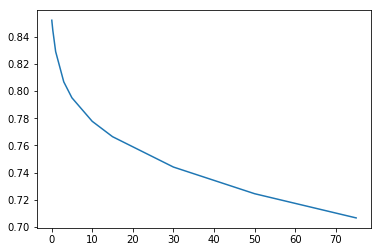

In [31]:
plt.plot(alphas,Score)# Alpha vs R Square.


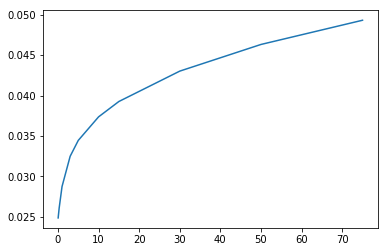

In [32]:
plt.plot(alphas,MSE)

In [33]:
ridgeRegCV.fit(X_train,y_train)
#print(model.score(X_test,y_test))
print(ridgeRegCV.alpha_) # Best results

0.3


In [34]:
# Creating a prediction model for Test set
RidReg = Ridge(alpha=ridgeRegCV.alpha_)
RidReg.fit(X_train,y_train)
# Prediction model for test data
Pred_CV = RidReg.predict(df_test)
Pred_CV

array([ 11.82932762,  11.28125642,  11.70848772, ...,  11.63905642,
        11.58564495,  11.73126202])

In [35]:
np.exp(Pred_CV)

array([ 137218.19699548,   79320.85934085,  121599.44887918, ...,
        113443.07190626,  107542.88223701,  124400.56789232])

### Model 2: Use Lasso regression and select the best tuning parameter 
- Please plot the cross-validation error for different tuning parameters
- Choose the best tuning paramter using cross-validation


In [36]:
Lasso_Model = LassoCV(alphas=alphas, max_iter=5000,n_alphas=11)
Lasso_Model.fit(X_train,y_train)

LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], copy_X=True,
    cv=None, eps=0.001, fit_intercept=True, max_iter=5000, n_alphas=11,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [37]:
print(Lasso_Model.alpha_) # Best Tuning parameter

0.05


In [38]:
Score = []
MSE=[]

In [39]:
for i in alphas:
    LassoReg = Lasso(alpha=i)
    LassoReg.fit(X_train,y_train)
    Pred_CV = LassoReg.predict(X_test)
    Score.append(LassoReg.score(X_test,y_test))
    # calculating and ploating MSE Error
    #Pred_CV = LassoReg.predict(X_test)
    mse = np.mean((Pred_CV - y_test)**2)
    MSE.append(mse)

In [40]:
print(MSE)


[0.10931088851602, 0.14870321441162898, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672, 0.16836642023629672]


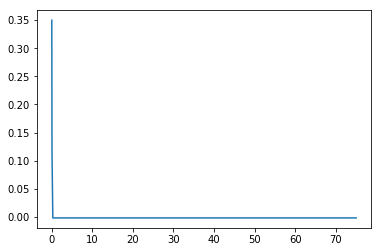

In [41]:
plt.plot(alphas,Score)

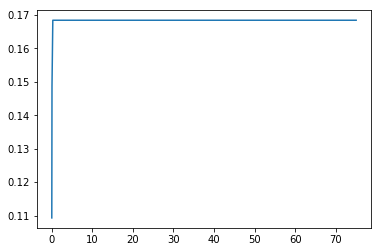

In [42]:
plt.plot(alphas,MSE)

In [43]:
# Creating a prediction model for Test set
LassoReg = Lasso(alpha=Lasso_Model.alpha_) 
LassoReg.fit(X_train,y_train)
# calculating and ploating MSE Error
Pred_CV = LassoReg.predict(df_test)
Pred_CV

array([ 12.23525675,  12.23525675,  12.23525675, ...,  12.23525675,
        12.23747673,  12.18755788])

In [44]:
np.exp(Pred_CV)

array([ 205922.82756297,  205922.82756297,  205922.82756297, ...,
        205922.82756297,  206380.47965303,  196331.11627982])